In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [2]:
members=pd.read_csv('data/NSS_GreatCare_Members.csv')
admissions=pd.read_csv('data/NSS_Hospital_Inpatient_Admissions.csv')
pcp=pd.read_csv('data/NSS_PrimaryCare_Office_Visits.csv', low_memory=False)

In [3]:
sadwall=admissions.merge(members, how='inner', on='Patient ID')
sadwall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6213 entries, 0 to 6212
Data columns (total 85 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Encounter ID                                                     6213 non-null   object 
 1   Patient ID                                                       6213 non-null   object 
 2   Encounter Primary Payor ID                                       6213 non-null   object 
 3   Encounter Primary Plan ID                                        6213 non-null   object 
 4   Facility Provider ID                                             6213 non-null   object 
 5   Attending Provider ID                                            5884 non-null   object 
 6   Attending Provider NPI                                           5884 non-null   float64
 7   Facility Provider NPI                     

In [4]:
wonderwall=admissions.merge(pcp, how='left', on='Patient ID')

In [5]:
members.head(3)

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Plan Description,Primary Payor Description,Primary Plan Financial Class Description,Is Primary Plan Financial Class Commercial,Is Primary Plan Financial Class Medicare FFS,Is Primary Plan Financial Class Medicare Advantage,Is Primary Plan Financial Class Medicaid,Is Primary Plan Financial Class Other,Count Active Plan Memberships,Is Medicaid Eligible,CMS Dual Status Code,Is CMS ESRD Status,Is CMS Hospice Status,Count CCW Conditions,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Alzheimers Disease and Related Disorders or Senile Deme,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Benign Prostatic Hyperplasia,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00,2013-04-11 00:00:00+00
1,DS1|10,DS1|5047W,DS1|1,1,54,1958-12-10,90024.0,6,1.0,5.0,NaN,1.457336e+09,"NELSEN, KAY M.",1.144213e+09,REGENTS OF THE UNIV OF CA,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2012-12-10 00:00:00+00,2013-01-01 00:00:00+00
2,DS1|100,DS1|5047W,DS1|1,1,2,2012-08-04,90008.0,1,1.0,1.0,NaN,1.477565e+09,"KAMINKER, SHARON .",1.043427e+09,UCLA MEDICAL GROUP,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-04-18 00:00:00+00,2015-05-18 00:00:00+00


In [6]:
wonderwall[['Encounter Start Date','Encounter End Date']] = sadwall[['Encounter Start Date','Encounter End Date']].\
                                                apply(lambda x: pd.to_datetime(x))
sadwall[['Encounter Start Date','Encounter End Date']] = sadwall[['Encounter Start Date','Encounter End Date']].\
                                                apply(lambda x: pd.to_datetime(x))
pcp[['Encounter Date']] = pcp[['Encounter Date']].\
                                                apply(lambda x: pd.to_datetime(x))
admit1 = sadwall.sort_values(['Patient ID','Encounter Start Date']) 

In [7]:
admit1['Readmit30']=admit1.groupby('Patient ID').apply(lambda x : (x['Encounter Start Date'].
        shift(-1)-x['Encounter End Date']).dt.days.between(0,30).astype(int)).reset_index(0).drop('Patient ID',1)
admit1.head(5)

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Plan Description,Primary Payor Description,Primary Plan Financial Class Description,Is Primary Plan Financial Class Commercial,Is Primary Plan Financial Class Medicare FFS,Is Primary Plan Financial Class Medicare Advantage,Is Primary Plan Financial Class Medicaid,Is Primary Plan Financial Class Other,Count Active Plan Memberships,Is Medicaid Eligible,CMS Dual Status Code,Is CMS ESRD Status,Is CMS Hospice Status,Count CCW Conditions,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Alzheimers Disease and Related Disorders or Senile Deme,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Benign Prostatic Hyperplasia,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date,Readmit30
117,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1962461012,1.962461e+09,1710918545,2013-06-13,2013-06-16,1,0,1.0,1,1,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0,29219.00,250.0,DS1|5047W,DS1|1,1,54,1958-12-10,90024.0,6,1.0,5.0,NaN,1.457336e+09,"NELSEN, KAY M.",1.144213e+09,REGENTS OF THE UNIV OF CA,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2012-12-10 00:00:00+00,2013-01-01 00:00:00+00,0
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,DS1|5047X,DS1|1,1,1,2012-11-09,94123.0,2,2.0,2.0,NaN,1.225216e+09,"CLIMACO, ANNE MAE B.",1.043427e+09,UCLA MEDICAL GROUP,GreatCare Silver,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-01-01 00:00:00+00,2014-02-16 00:00:00+00,0
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0,DS1|5047Y,DS1|1,1,34,1979-12-28,90307.0,3,2.0,3.0,NaN,1.619200e+09,"CANALE, STEPHANIE .",1.043427e+09,UCLA MEDICAL GROUP,GreatCare Bronze,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [8]:
xx=admit1.groupby(['Readmit30']).count()
xx

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Plan Description,Primary Payor Description,Primary Plan Financial Class Description,Is Primary Plan Financial Class Commercial,Is Primary Plan Financial Class Medicare FFS,Is Primary Plan Financial Class Medicare Advantage,Is Primary Plan Financial Class Medicaid,Is Primary Plan Financial Class Other,Count Active Plan Memberships,Is Medicaid Eligible,CMS Dual Status Code,Is CMS ESRD Status,Is CMS Hospice Status,Count CCW Conditions,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Alzheimers Disease and Related Disorders or Senile Deme,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Benign Prostatic Hyperplasia,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
Readmit30,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5513,5513,5513,5513,5513,5237,5237,5513,5513,5513,5513,5513,5497,5341,5513,4763,1427,1412,4072,4026,5513,5513,5513,5513,5513,5513,5513,5513,5485,5513,3738,3730,0,3738,3736,3729,3729,5513,0,5513,5513,5513,5513,5513,5513,5513,5513,0,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513,5513
1,700,700,700,700,700,647,647,700,700,700,700,700,699,686,700,615,193,189,505,496,700,700,700,700,700,700,700,700,695,700,519,517,0,519,519,517,517,700,0,700,700,700,700,700,700,700,700,0,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700


In [9]:
v=admit1.groupby(['Primary Plan Description']).count()
v

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Payor Description,Primary Plan Financial Class Description,Is Primary Plan Financial Class Commercial,Is Primary Plan Financial Class Medicare FFS,Is Primary Plan Financial Class Medicare Advantage,Is Primary Plan Financial Class Medicaid,Is Primary Plan Financial Class Other,Count Active Plan Memberships,Is Medicaid Eligible,CMS Dual Status Code,Is CMS ESRD Status,Is CMS Hospice Status,Count CCW Conditions,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Alzheimers Disease and Related Disorders or Senile Deme,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Benign Prostatic Hyperplasia,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date,Readmit30
Primary Plan Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GreatCare Bronze,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,22,8,8,17,17,25,25,25,25,25,25,25,25,25,25,15,15,0,15,15,15,15,0,25,25,25,25,25,25,25,25,0,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
GreatCare Gold,3154,3154,3154,3154,3154,2976,2976,3154,3154,3154,3154,3154,3141,3056,3154,2715,771,760,2374,2345,3154,3154,3154,3154,3154,3154,3154,3154,3136,3154,2186,2181,0,2186,2185,2181,2181,0,3154,3154,3154,3154,3154,3154,3154,3154,0,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154
GreatCare MA,512,512,512,512,512,491,491,512,512,512,512,512,512,501,512,450,148,148,363,358,512,512,512,512,512,512,512,512,509,512,364,363,0,364,364,362,362,0,512,512,512,512,512,512,512,512,0,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512
GreatCare Medicaid,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,10,10,7,7,17,17,17,17,17,17,17,17,17,17,10,10,0,10,10,10,10,0,17,17,17,17,17,17,17,17,0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
GreatCare Silver,2505,2505,2505,2505,2505,2375,2375,2505,2505,2505,2505,2505

In [10]:
readmit_pts = admit1[admit1['Readmit30'] == 1]
readmit_pts

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Plan Description,Primary Payor Description,Primary Plan Financial Class Description,Is Primary Plan Financial Class Commercial,Is Primary Plan Financial Class Medicare FFS,Is Primary Plan Financial Class Medicare Advantage,Is Primary Plan Financial Class Medicaid,Is Primary Plan Financial Class Other,Count Active Plan Memberships,Is Medicaid Eligible,CMS Dual Status Code,Is CMS ESRD Status,Is CMS Hospice Status,Count CCW Conditions,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Alzheimers Disease and Related Disorders or Senile Deme,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Benign Prostatic Hyperplasia,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date,Readmit30
35,HIA|DS1|10451|DS1|NPI|1063412005|1,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1063412005,DS1|NPI|1518963032,1.518963e+09,1063412005,2013-03-20,2013-03-23,0,0,1.0,1,1,23.0,980.0,Toxic effect of ethyl alcohol,NaN,NaN,0,5568.00,250.0,DS1|5047X,DS1|1,1,48,1964-09-05,95616.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00,2013-01-15 00:00:00+00,1
45,HIA|DS1|10451|DS1|NPI|1902844988|1,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1902844988,DS1|NPI|1811123151,1.811123e+09,1902844988,2013-03-27,2013-04-16,1,1,1.0,1,70,21.0,571.1,Acute alcoholic hepatitis,NaN,NaN,0,17978.94,250.0,DS1|5047X,DS1|1,1,48,1964-09-05,95616.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00,2013-01-15 00:00:00+00,1
37,HIA|DS1|10451|DS1|NPI|1427055839|1,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1427055839,DS1|NPI|1427344951,1.427345e+09,1427055839,2013-04-16,2013-04-26,0,0,2.0,4,6,21.0,571.2,Alcoholic cirrhosis of liver,NaN,NaN,0,54450.00,50.0,DS1|5047X,DS1|1,1,48,1964-09-05,95616.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00,2013-01-15 00:00:00+00,1
39,HIA|DS1|10451|DS1|NPI|1427055839|3,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1427055839,DS1|

In [11]:
r=700/(5513+700)*100
r

11.26669885723483

In [12]:
pcp.head(3)

,Encounter ID,Patient ID,Service Provider ID,Attending Provider ID,Provider Group Provider ID,Facility Provider ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Attending Provider NPI,Facility Provider NPI,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code
0,COV|EE|DS1|10076|20110225|DS1|NPI|1487856779,DS1|10076,DS1|NPI|1487856779,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.487857e+09,1.043427e+09,2011-02-18,0,1,0,0,NaN
1,COV|EE|DS1|10088|20140222|DS1|NPI|1528030996,DS1|10088,DS1|NPI|1528030996,DS1|NPI|1528030996,DS1|NPI|1043427248,DS1|NPI|1902803315,DS1|1,DS1|5047W,1.528031e+09,1.902803e+09,1.528031e+09,1.043427e+09,2014-02-22,0,1,1,1,NaN
2,COV|EE|DS1|10165|20140907|DS1|NPI|1477579365,DS1|10165,DS1|NPI|1477579365,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.477579e+09,1.043427e+09,2014-08-31,0,1,0,0,NaN


In [13]:
wonderwall=admissions.merge(pcp, how='left', on='Patient ID')
wonderwall.head(3)

,Encounter ID_x,Patient ID,Encounter Primary Payor ID_x,Encounter Primary Plan ID_x,Facility Provider ID_x,Attending Provider ID_x,Attending Provider NPI_x,Facility Provider NPI_x,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Encounter ID_y,Service Provider ID,Attending Provider ID_y,Provider Group Provider ID,Facility Provider ID_y,Encounter Primary Payor ID_y,Encounter Primary Plan ID_y,Attending Provider NPI_y,Facility Provider NPI_y,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,COV|PBSL|DS1|10033|P|1228384|1043427248|1|SHIFTED,DS1|NPI|1619980406,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047X,NaN,NaN,1.619980e+09,1.043427e+09,2015-12-08,1.0,1.0,0.0,0.0,99392
1,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,COV|PBSL|DS1|10033|P|1326684|1043427248|1|SHIFTED,DS1|NPI|1225216351,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.225216e+09,1.043427e+09,2012-06-18,1.0,1.0,0.0,0.0,99385
2,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,COV|PBSL|DS1|10033|P|155317|1043427248|1|SHIFTED,DS1|NPI|1619980406,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047X,NaN,NaN,1.619980e+09,1.043427e+09,2014-06-10,1.0,1.0,0.0,0.0,99392


In [14]:
wonderwall[['Encounter Start Date','Encounter End Date']] = sadwall[['Encounter Start Date','Encounter End Date']].\
                                                apply(lambda x: pd.to_datetime(x))

wonderwall['diff']=wonderwall['Encounter Date'] - wonderwall['Encounter End Date']
wonderwall['diff']=wonderwall['diff'].astype('timedelta64[D]')
wonderwall.head(3)

,Encounter ID_x,Patient ID,Encounter Primary Payor ID_x,Encounter Primary Plan ID_x,Facility Provider ID_x,Attending Provider ID_x,Attending Provider NPI_x,Facility Provider NPI_x,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Encounter ID_y,Service Provider ID,Attending Provider ID_y,Provider Group Provider ID,Facility Provider ID_y,Encounter Primary Payor ID_y,Encounter Primary Plan ID_y,Attending Provider NPI_y,Facility Provider NPI_y,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code,diff
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,COV|PBSL|DS1|10033|P|1228384|1043427248|1|SHIFTED,DS1|NPI|1619980406,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047X,NaN,NaN,1.619980e+09,1.043427e+09,2015-12-08,1.0,1.0,0.0,0.0,99392,1058.0
1,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2014-01-05,2014-01-12,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,COV|PBSL|DS1|10033|P|1326684|1043427248|1|SHIFTED,DS1|NPI|1225216351,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.225216e+09,1.043427e+09,2012-06-18,1.0,1.0,0.0,0.0,99385,-573.0
2,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2012-06-13,2012-06-21,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,COV|PBSL|DS1|10033|P|155317|1043427248|1|SHIFTED,DS1|NPI|1619980406,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047X,NaN,NaN,1.619980e+09,1.043427e+09,2014-06-10,1.0,1.0,0.0,0.0,99392,719.0


In [15]:
#wonderwall['that_diff'] = wonderwall['that_diff'].astype(int)
pcp7=wonderwall[wonderwall['diff'].between(0.0,7.0)]
pcp7.head(3)

,Encounter ID_x,Patient ID,Encounter Primary Payor ID_x,Encounter Primary Plan ID_x,Facility Provider ID_x,Attending Provider ID_x,Attending Provider NPI_x,Facility Provider NPI_x,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Encounter ID_y,Service Provider ID,Attending Provider ID_y,Provider Group Provider ID,Facility Provider ID_y,Encounter Primary Payor ID_y,Encounter Primary Plan ID_y,Attending Provider NPI_y,Facility Provider NPI_y,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code,diff
25,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-07-06,2012-07-07,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,COV|PBSL|DS1|10073|P|1089509|1043427248|1|SHIFTED,DS1|NPI|1144254590,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047X,NaN,NaN,1.144255e+09,1.043427e+09,2012-07-13,0.0,1.0,0.0,0.0,NaN,6.0
635,HIA|DS1|10713|DS1|NPI|1427055839|1,DS1|10713,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1295842771,1.295843e+09,1427055839,2015-04-11,2015-04-16,0,0,3.0,1,30,21.0,NaN,NaN,K80.44,Calculus of bile duct with chronic cholecystit...,0,141485.92,250.0,COV|PBSL|DS1|10713|P|883242|1043427248|1,DS1|NPI|1386919454,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.386919e+09,1.043427e+09,2015-04-17,0.0,1.0,0.0,0.0,NaN,1.0
874,HIA|DS1|10750|DS1|NPI|1710065933|3,DS1|10750,DS1|1,DS1|5047W,DS1|NPI|1710065933,DS1|NPI|1063435055,1.063435e+09,1710065933,2010-11-04,2010-11-07,1,0,1.0,1,1,21.0,NaN,NaN,F44.9,"Dissociative and conversion disorder, unspecified",0,12102.00,0.0,COV|IBSL|DS1|IB|DS1|10750|I|779164|1003957820|2,DS1|NPI|1962558312,DS1|NPI|1962558312,NaN,DS1|NPI|1710065933,DS1|1,DS1|5047W,1.962558e+09,1.710066e+09,1.962558e+09,NaN,2010-11-12,0.0,1.0,1.0,1.0,NaN,5.0


In [16]:
pcp_rate=round(len(pcp7)/len(admissions)*100, 2)
pcp_rate

0.32

In [17]:
pcp7_u_count= len(pd.unique(pcp7['Patient ID']))
pcp7_u_count

19

In [18]:
admit_u_count = len(pd.unique(admit1['Patient ID']))
admit_u_count

4701

In [19]:
539/4701

0.11465645607317591

In [20]:
members2=members.reset_index()
members2.head(2)

,index,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Plan Description,Primary Payor Description,Primary Plan Financial Class Description,Is Primary Plan Financial Class Commercial,Is Primary Plan Financial Class Medicare FFS,Is Primary Plan Financial Class Medicare Advantage,Is Primary Plan Financial Class Medicaid,Is Primary Plan Financial Class Other,Count Active Plan Memberships,Is Medicaid Eligible,CMS Dual Status Code,Is CMS ESRD Status,Is CMS Hospice Status,Count CCW Conditions,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Alzheimers Disease and Related Disorders or Senile Deme,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Benign Prostatic Hyperplasia,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
0,0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00,2013-04-11 00:00:00+00
1,1,DS1|10,DS1|5047W,DS1|1,1,54,1958-12-10,90024.0,6,1.0,5.0,NaN,1.457336e+09,"NELSEN, KAY M.",1.144213e+09,REGENTS OF THE UNIV OF CA,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2012-12-10 00:00:00+00,2013-01-01 00:00:00+00


In [21]:
memb=members2[['Patient ID', 'Primary Plan Description', 'Is CCW Acquired Hypothyroidism','Is CCW Acute Myocardial Infarction',
              'Is CCW Alzheimers Disease',
              'Is CCW Anemia','Is CCW Asthma','Is CCW Atrial Fibrillation',
              'Is CCW Breast Cancer','Is CCW Cataract','Is CCW CKD','Is CCW COPD and Bronchiectasis',
              'Is CCW Colorectal Cancer','Is CCW Depression','Is CCW Diabetes','Is CCW Endometrial Cancer','Is CCW Glaucoma',
              'Is CCW Heart Failure','Is CCW Hip or Pelvic Fracture','Is CCW Hyperlipidemia','Is CCW Hypertension',
              'Is CCW Ischemic Heart Disease',
              'Is CCW Lung Cancer','Is CCW Osteoporosis','Is CCW Prostate Cancer',
              'Is CCW Rheumatoid Arthritis or Osteoarthritis','Is CCW Stroke or Transient Ischemic Attack',
              'Is CCW ASCVD','Is CCW Anxiety Disorders','Is CCW Depressive Disorders',
              'Is CCW Schizophrenia or Other Psychotic Disorders','Is CCW Bipolar Disorder']]
memb.head(3)

,Patient ID,Primary Plan Description,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder
0,DS1|1,GreatCare Gold,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,DS1|10,GreatCare Gold,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,DS1|100,GreatCare Gold,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
readmit_cut=readmit_pts[['Patient ID', 'Readmit30']]
readmit_cut.head(5)

,Patient ID,Readmit30
35,DS1|10451,1
45,DS1|10451,1
37,DS1|10451,1
39,DS1|10451,1
40,DS1|10451,1


In [23]:
wonderwall2=readmit_cut.merge(memb, how='inner', on='Patient ID')
wonderwall2.head(2)

,Patient ID,Readmit30,Primary Plan Description,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder
0,DS1|10451,1,GreatCare Silver,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,DS1|10451,1,GreatCare Silver,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [24]:
v

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Payor Description,Primary Plan Financial Class Description,Is Primary Plan Financial Class Commercial,Is Primary Plan Financial Class Medicare FFS,Is Primary Plan Financial Class Medicare Advantage,Is Primary Plan Financial Class Medicaid,Is Primary Plan Financial Class Other,Count Active Plan Memberships,Is Medicaid Eligible,CMS Dual Status Code,Is CMS ESRD Status,Is CMS Hospice Status,Count CCW Conditions,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Alzheimers Disease and Related Disorders or Senile Deme,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Benign Prostatic Hyperplasia,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date,Readmit30
Primary Plan Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GreatCare Bronze,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,22,8,8,17,17,25,25,25,25,25,25,25,25,25,25,15,15,0,15,15,15,15,0,25,25,25,25,25,25,25,25,0,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
GreatCare Gold,3154,3154,3154,3154,3154,2976,2976,3154,3154,3154,3154,3154,3141,3056,3154,2715,771,760,2374,2345,3154,3154,3154,3154,3154,3154,3154,3154,3136,3154,2186,2181,0,2186,2185,2181,2181,0,3154,3154,3154,3154,3154,3154,3154,3154,0,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154
GreatCare MA,512,512,512,512,512,491,491,512,512,512,512,512,512,501,512,450,148,148,363,358,512,512,512,512,512,512,512,512,509,512,364,363,0,364,364,362,362,0,512,512,512,512,512,512,512,512,0,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512
GreatCare Medicaid,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,10,10,7,7,17,17,17,17,17,17,17,17,17,17,10,10,0,10,10,10,10,0,17,17,17,17,17,17,17,17,0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
GreatCare Silver,2505,2505,2505,2505,2505,2375,2375,2505,2505,2505,2505,2505

In [25]:
readmit_bronze_plan = wonderwall2[wonderwall2['Primary Plan Description'] == 'GreatCare Bronze']
readmit_bronze=readmit_bronze_plan.drop(['Patient ID', 'Readmit30'], axis=1)
xb=readmit_bronze.sum(axis = 0, skipna = True)
yb = pd.DataFrame(data=xb)
bronze=yb.T
bronze


,Primary Plan Description,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder
0,GreatCare BronzeGreatCare BronzeGreatCare Bronze,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [26]:
readmit_silver_plan = wonderwall2[wonderwall2['Primary Plan Description'] == 'GreatCare Silver']
readmit_silver=readmit_silver_plan.drop(['Patient ID', 'Readmit30'], axis=1)
xs=readmit_silver.sum(axis = 0, skipna = True)
ys = pd.DataFrame(data=xs)
silver=ys.T
silver

,Primary Plan Description,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder
0,GreatCare SilverGreatCare SilverGreatCare Silv...,5,0,0,63,9,10,2,15,57,6,3,44,38,7,11,23,1,20,55,23,5,2,2,28,14,12,22,29,1,0


In [27]:
readmit_gold_plan = wonderwall2[wonderwall2['Primary Plan Description'] == 'GreatCare Gold']
readmit_gold=readmit_gold_plan.drop(['Patient ID', 'Readmit30'], axis=1)
xg=readmit_gold.sum(axis = 0, skipna = True)
yg = pd.DataFrame(data=xg)
gold=yg.reset_index()
yg

,0
Primary Plan Description,GreatCare GoldGreatCare GoldGreatCare GoldGrea...
Is CCW Acquired Hypothyroidism,19
Is CCW Acute Myocardial Infarction,3
Is CCW Alzheimers Disease,2
Is CCW Anemia,123
Is CCW Asthma,21
Is CCW Atrial Fibrillation,16
Is CCW Breast Cancer,0
Is CCW Cataract,5
Is CCW CKD,114


In [28]:
readmit_medicaid_plan = wonderwall2[wonderwall2['Primary Plan Description'] == 'GreatCare Medicaid']
readmit_medicaid=readmit_medicaid_plan.drop(['Patient ID', 'Readmit30'], axis=1)
xmc=readmit_medicaid.sum(axis = 0, skipna = True)
ymc = pd.DataFrame(data=xmc)
medicaid=ymc.T
medicaid

,Primary Plan Description,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder
0,GreatCare MedicaidGreatCare MedicaidGreatCare ...,0,0,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [29]:
readmit_ma_plan = wonderwall2[wonderwall2['Primary Plan Description'] == 'GreatCare MA']
readmit_ma=readmit_ma_plan.drop(['Patient ID', 'Readmit30'], axis=1)
xma=readmit_ma.sum(axis = 0, skipna = True)
yma = pd.DataFrame(data=xma)
ma=yma.T
ma

,Primary Plan Description,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder
0,GreatCare MAGreatCare MAGreatCare MAGreatCare ...,1,0,0,5,1,0,0,0,5,1,2,1,5,0,0,2,0,3,5,2,0,3,1,5,1,0,4,3,0,0


In [30]:
ages=members[['Patient Age Integer', 'Primary Plan Description']]
ages['Patient Age Integer']=pd.to_numeric(ages['Patient Age Integer'])
avg_age_by_plan=ages.groupby(['Primary Plan Description']).mean()
avg_age_by_plan

<ipython-input-30-2fb22ee21a22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ages['Patient Age Integer']=pd.to_numeric(ages['Patient Age Integer'])


,Patient Age Integer
Primary Plan Description,
GreatCare Bronze,34.157480
GreatCare Gold,36.487886
GreatCare MA,36.243368
GreatCare Medicaid,34.259494
GreatCare Silver,36.201189


In [31]:
total_patients=members.groupby(['Primary Plan Description']).count()
total_patients_by_plan=total_patients[['Patient ID']]
total_patients_by_plan

,Patient ID
Primary Plan Description,
GreatCare Bronze,254
GreatCare Gold,29470
GreatCare MA,6069
GreatCare Medicaid,158
GreatCare Silver,25568


In [32]:
abcd=readmit_pts[['Primary Plan Description', 'Is CCW Acquired Hypothyroidism','Is CCW Acute Myocardial Infarction',
              'Is CCW Alzheimers Disease',
              'Is CCW Anemia','Is CCW Asthma','Is CCW Atrial Fibrillation',
              'Is CCW Breast Cancer','Is CCW Cataract','Is CCW CKD','Is CCW COPD and Bronchiectasis',
              'Is CCW Colorectal Cancer','Is CCW Depression','Is CCW Diabetes','Is CCW Endometrial Cancer','Is CCW Glaucoma',
              'Is CCW Heart Failure','Is CCW Hip or Pelvic Fracture','Is CCW Hyperlipidemia','Is CCW Hypertension',
              'Is CCW Ischemic Heart Disease',
              'Is CCW Lung Cancer','Is CCW Osteoporosis','Is CCW Prostate Cancer',
              'Is CCW Rheumatoid Arthritis or Osteoarthritis','Is CCW Stroke or Transient Ischemic Attack',
              'Is CCW ASCVD','Is CCW Anxiety Disorders','Is CCW Depressive Disorders',
              'Is CCW Schizophrenia or Other Psychotic Disorders','Is CCW Bipolar Disorder']]
abc=abcd.groupby(['Primary Plan Description']).sum()
abct=abc.T
abct

Primary Plan Description,GreatCare Bronze,GreatCare Gold,GreatCare MA,GreatCare Medicaid,GreatCare Silver
Is CCW Acquired Hypothyroidism,0,19,1,0,5
Is CCW Acute Myocardial Infarction,0,3,0,0,0
Is CCW Alzheimers Disease,0,2,0,0,0
Is CCW Anemia,0,123,5,2,63
Is CCW Asthma,0,21,1,0,9
Is CCW Atrial Fibrillation,0,16,0,0,10
Is CCW Breast Cancer,0,0,0,0,2
Is CCW Cataract,0,5,0,0,15
Is CCW CKD,0,114,5,1,57
Is CCW COPD and Bronchiectasis,0,14,1,0,6


NameError: name 'bulbasaur' is not defined

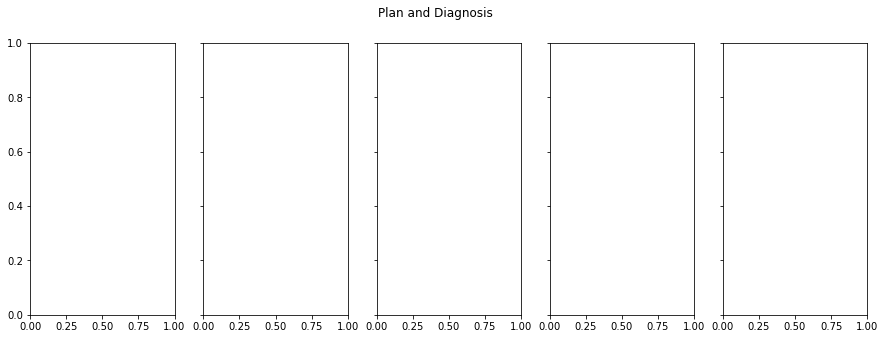

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('Plan and Diagnosis')

# Gold
sns.barplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
axes[0].set_title(bulbasaur.name)

# Charmander
sns.barplot(ax=axes[1], x=charmander.index, y=charmander.values)
axes[1].set_title(charmander.name)

# Squirtle
sns.barplot(ax=axes[2], x=squirtle.index, y=squirtle.values)
axes[2].set_title(squirtle.name)

In [ ]:
sns.catplot(x = "Primary Plan Description",
            y = "total_bill",
            hue = "sex",
            col = "smoker",
            data = tips,
            kind = "violin",
            split = True)

plt.show()


In [ ]:
[['Patient ID', 'diff', 'Primary Plan Description', 'Is CCW Acquired Hypothyroidism',
  'Is CCW Acute Myocardial Infarction','Is CCW Alzheimers Disease',
##'Is CCW Alzheimers Disease and Related Disorders or Senile Deme',
  'Is CCW Anemia','Is CCW Asthma','Is CCW Atrial Fibrillation',
##'Is CCW Benign Prostatic Hyperplasia',
  'Is CCW Breast Cancer',
  'Is CCW Cataract','Is CCW CKD','Is CCW COPD and Bronchiectasis',
'Is CCW Colorectal Cancer','Is CCW Depression','Is CCW Diabetes',
  'Is CCW Endometrial Cancer','Is CCW Glaucoma',
'Is CCW Heart Failure','Is CCW Hip or Pelvic Fracture','Is CCW Hyperlipidemia',
  'Is CCW Hypertension', 'Is CCW Ischemic Heart Disease',
                  'Is CCW Lung Cancer','Is CCW Osteoporosis','Is CCW Prostate Cancer',
  'Is CCW Rheumatoid Arthritis or Osteoarthritis',
'Is CCW Stroke or Transient Ischemic Attack','Is CCW ASCVD','Is CCW Anxiety Disorders','Is CCW Depressive Disorders',
'Is CCW Schizophrenia or Other Psychotic Disorders','Is CCW Bipolar Disorder']]

In [ ]:
if len(df.index) > 0: 

res = df.loc[(df.merchant == data['transaction']['merchant']) & (df.amount == data['transaction']['amount'])]

res['timediff'] = (data['transaction']['time'] - res['time']).dt.total_seconds().abs() <= 120

if res.timediff.any(): continue

df = df.append(df1)

In [ ]:
To find duplicates:
pd.duplicated(subset= 'Patient ID', keep='first')

inpatient.duplicated(subset= 'Patient ID')